In [2]:
# disable warning
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('C:/Users/RubanVenkateshD/MBA/Thesis Data/Roberta graphs.csv', header=None, index_col=[0])
df = df[[1,2]].reset_index(drop=True)
df.columns = ['text', 'sentiment']
df.head()

,text,sentiment
0,TweetText,Sentiment
1,"With the use of #Blockchain, the pharmaceutica...",Neutral
2,.@IBM @Oracle @EUBlockchain & @mediledger are...,Neutral
3,Are You Ready For #Blockchain ? via @ravikikan...,Neutral
4,Many Pharma companies have already started on ...,Neutral


In [4]:
df = df.drop(0)
df.head()

,text,sentiment
1,"With the use of #Blockchain, the pharmaceutica...",Neutral
2,.@IBM @Oracle @EUBlockchain & @mediledger are...,Neutral
3,Are You Ready For #Blockchain ? via @ravikikan...,Neutral
4,Many Pharma companies have already started on ...,Neutral
5,Wonderful time at #HIMSS with the @HS_Blox tea...,Positive


In [5]:
import preprocess_kgptalkie as ps

df = ps.get_basic_features(df)

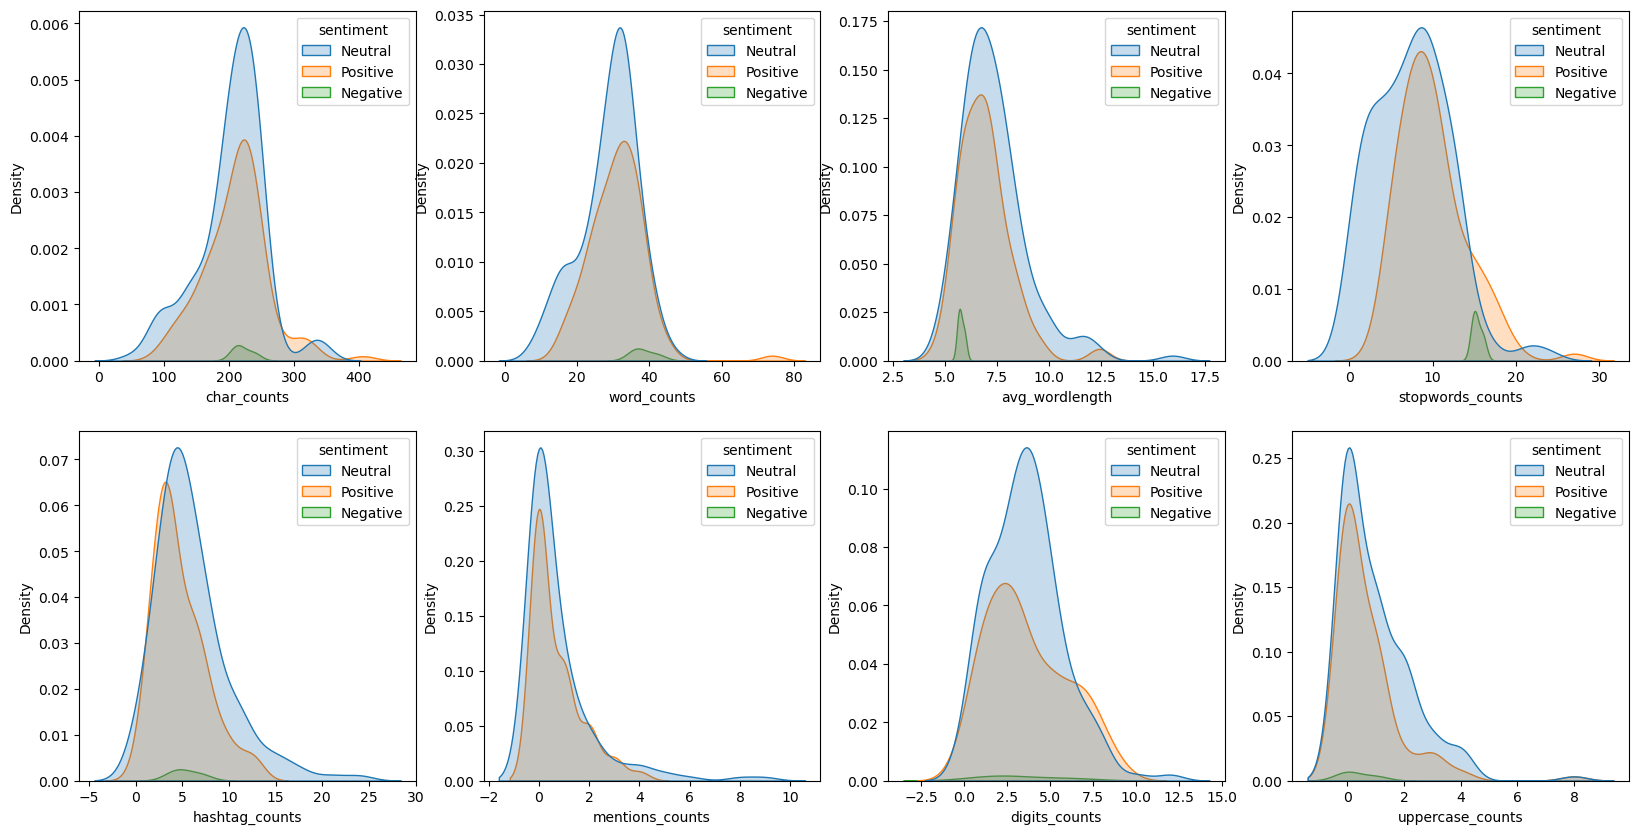

In [6]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

In [7]:
df.to_csv("C:/Users/RubanVenkateshD/MBA/Thesis Data/Roberta_tweet_analysis.csv", index=False)

In [8]:
df.head

<bound method NDFrame.head of                                                   text sentiment  char_counts  \
1    With the use of #Blockchain, the pharmaceutica...   Neutral          202   
2     .@IBM @Oracle @EUBlockchain & @mediledger are...   Neutral          216   
3    Are You Ready For #Blockchain ? via @ravikikan...   Neutral          235   
4    Many Pharma companies have already started on ...   Neutral          243   
5    Wonderful time at #HIMSS with the @HS_Blox tea...  Positive          182   
..                                                 ...       ...          ...   
259  #blockchain has already shook our notion of se...   Neutral          194   
260  Five use cases for #blockchain in #pharma: the...   Neutral          211   
261  #blockchain has already shook our notion of se...   Neutral          194   
262  The ability to counter counterfeit drugs can b...   Neutral          141   
263  “While the #pharma industry is awash with #blo...  Positive          319  

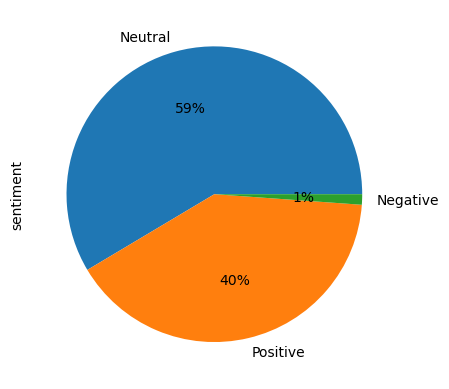

In [9]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')


# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

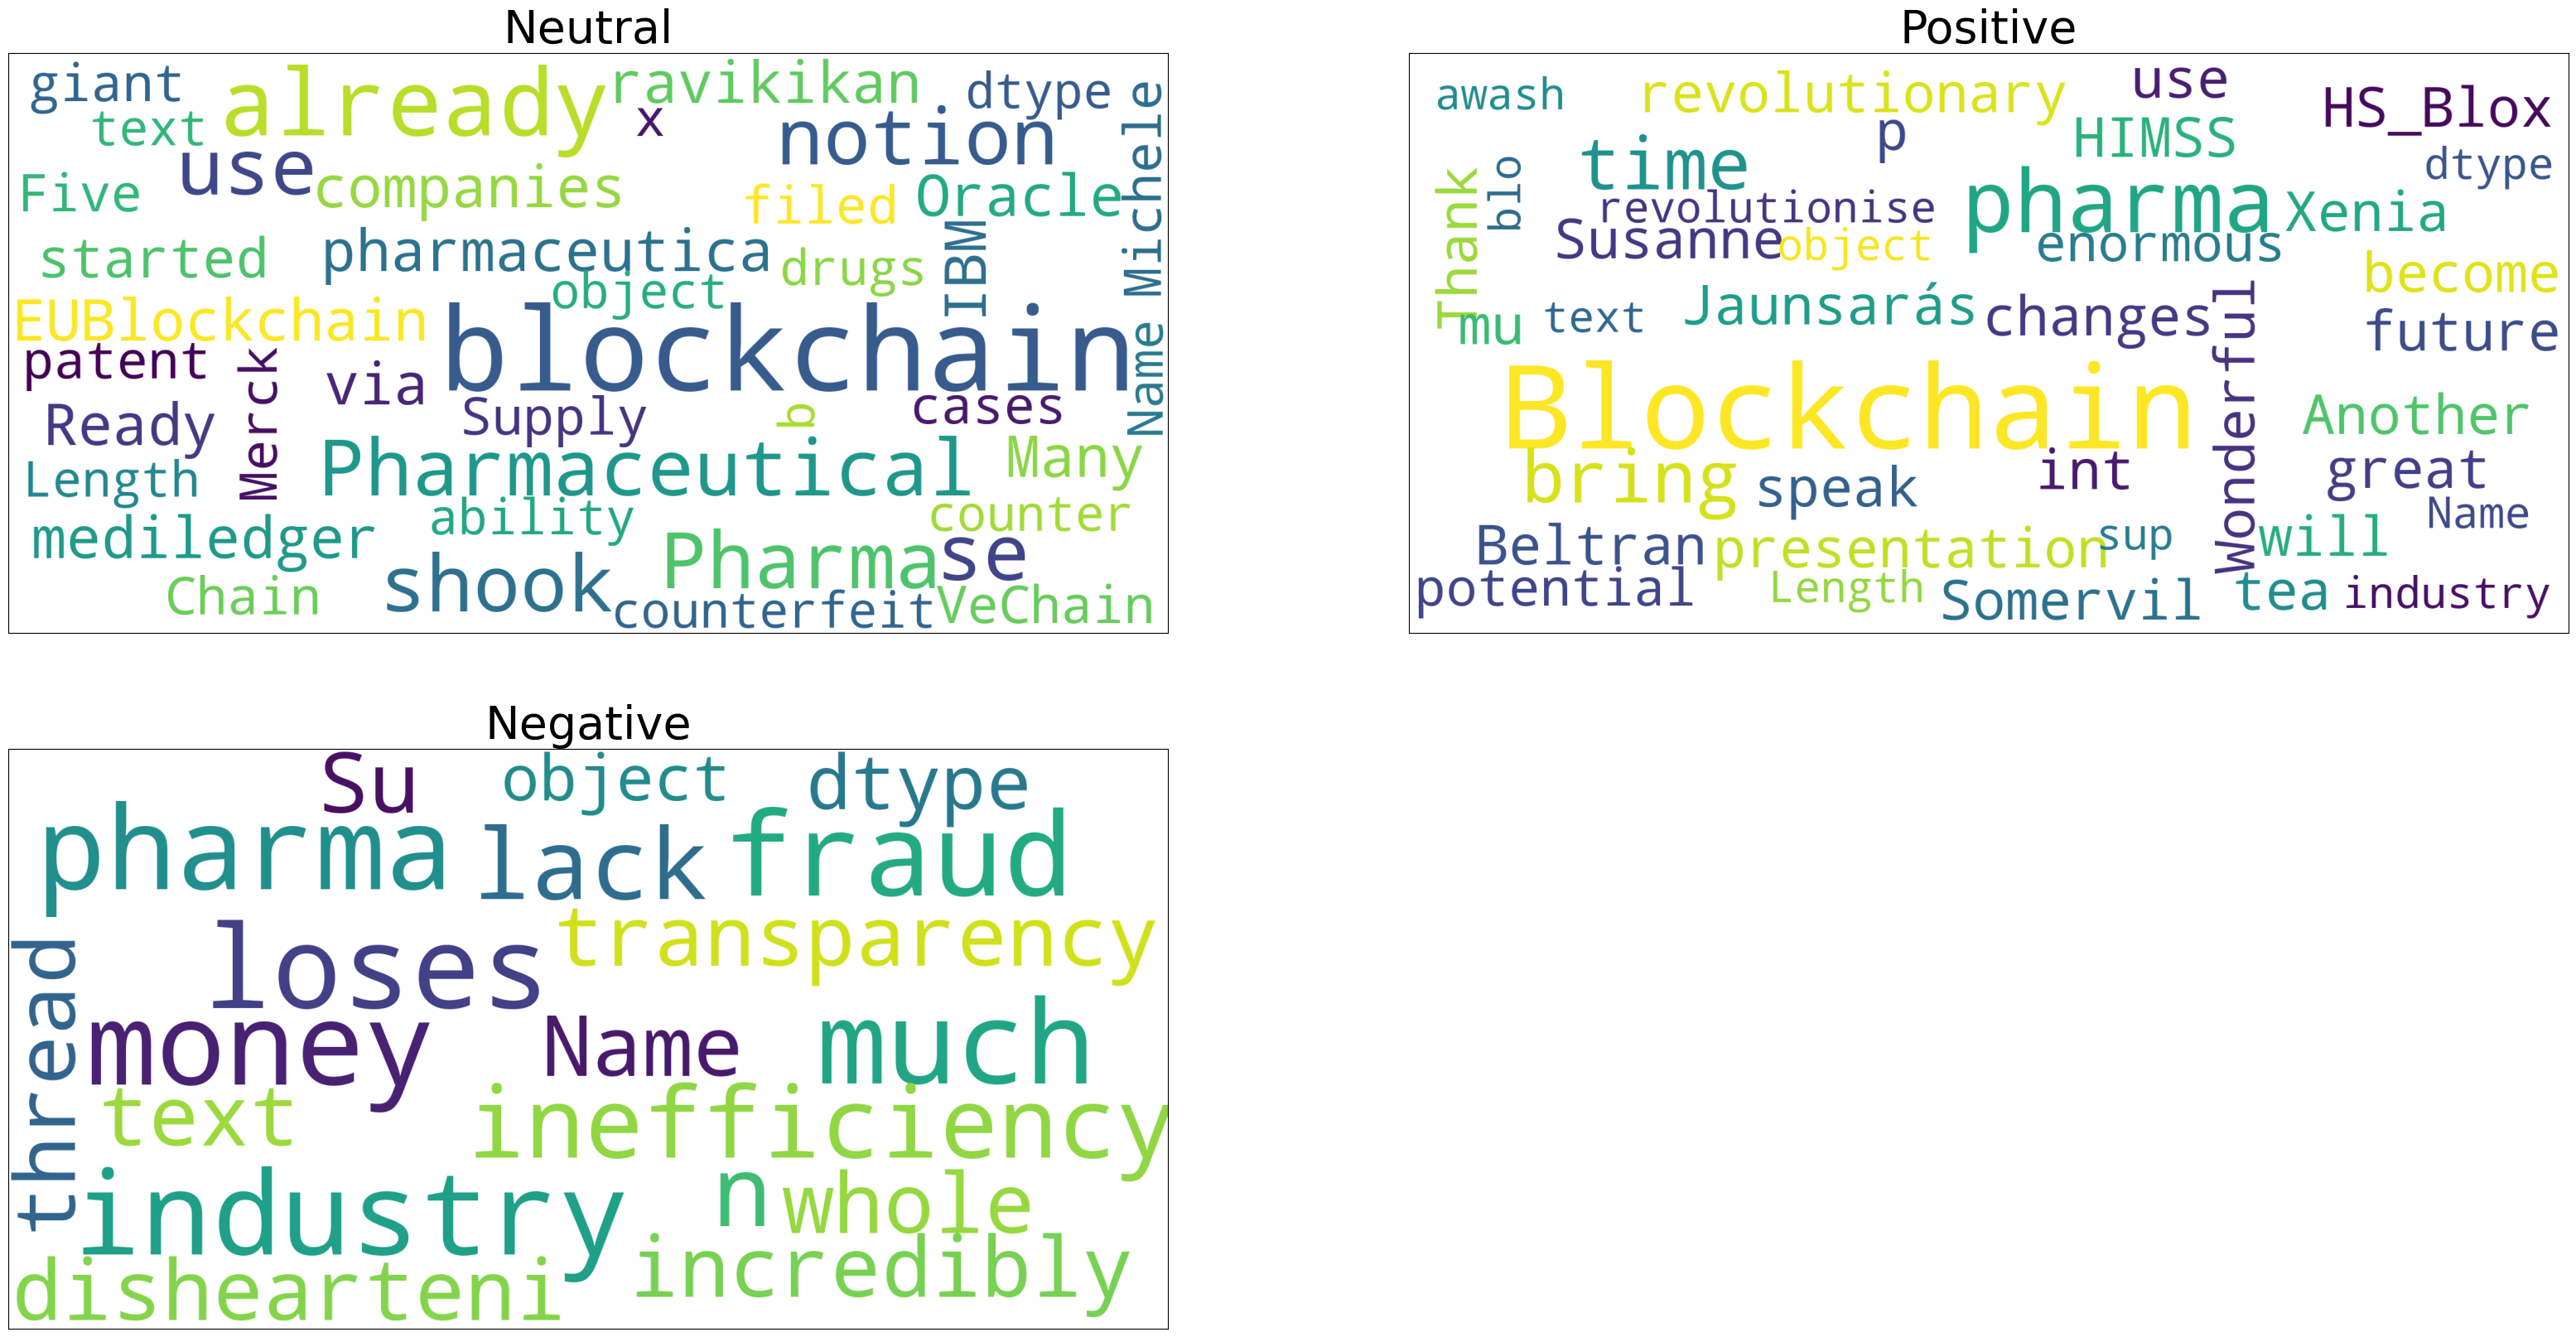

<Figure size 640x480 with 0 Axes>

In [10]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()